In [2]:
import matplotlib.pyplot as plt

import networkx as nx
from nltk.corpus import wordnet as wn

In [3]:
# example of one synset
pelican = wn.synset('pelican.n.01')
hyper = lambda s: s.hypernyms()
list(pelican.closure(hyper))

[Synset('pelecaniform_seabird.n.01'),
 Synset('seabird.n.01'),
 Synset('aquatic_bird.n.01'),
 Synset('bird.n.01'),
 Synset('vertebrate.n.01'),
 Synset('chordate.n.01'),
 Synset('animal.n.01'),
 Synset('organism.n.01'),
 Synset('living_thing.n.01'),
 Synset('whole.n.02'),
 Synset('object.n.01'),
 Synset('physical_entity.n.01'),
 Synset('entity.n.01')]

In [4]:
# example of categorization with one synset
poses = {'n':'noun', 'v':'verb', 's':'adj (s)', 'a': 'adj', 'r':'adv'}
for synset in wn.synsets('well'):
    print('{}: {}'.format(poses[synset.pos()],
    ', '.join([l.name() for l in synset.lemmas()])))

noun: well
noun: well
noun: well, wellspring, fountainhead
noun: well
noun: well
verb: well, swell
adj: well
adj (s): good, well
adj (s): well
adv: well, good
adv: well
adv: well, easily
adv: well
adv: well
adv: well
adv: well, considerably, substantially
adv: well, intimately
adv: well
adv: well
adv: well, advantageously
adv: well, comfortably
adv: well


In [5]:
w1 = wn.synset('king.n.01')
w2 = wn.synset('queen.n.01')
print(w1.wup_similarity(w2))
print('path similarity', w1.path_similarity(w2))

0.5714285714285714
path similarity 0.1


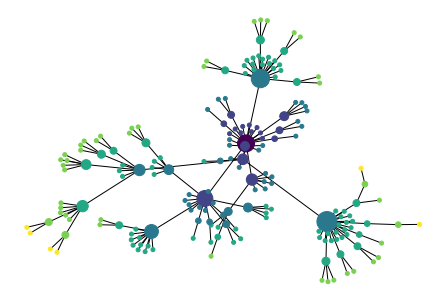

In [6]:
def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)

def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

def draw_graph(graph):
    nx.draw(graph, 
        pos = nx.spring_layout(graph),
        node_size = [16 * graph.degree(n) for n in graph],
        node_color = [graph.depth[n] for n in graph],
        with_labels=False)
    plt.show()

dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
draw_graph(graph)